# Лабораторная работа №1
## Выполнил студент группы БВТ2104 Юдин Артём Андреевич

### Оглавление
1. [Задание 1](#Задание-№1)
2. [Задание 2](#Задание-№2)
3. [Задание 3](#Задание-№3)
4. [Вывод](#Вывод)

### Задание №1
<i> Вызвать функцию print() и передать туда строку Hello, World! </i>

In [1]:
print("Hello, World!")

Hello, World!


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры <b>m</b>, <b>n</b>, <b>min_limit</b>, <b>max_limit</b>, где <b>m</b> и <b>n</b> указывают размер
матрицы, а <b>min_lim</b> и <b>max_lim</b> - минимальное и максимальное значение для
генерируемого числа.

In [1]:
import time
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def matrix(n: int, m: int, min_limit: int, max_limit: int) -> list[int]:
    mat = []

    for i in range(m):
        mat.append([])

        for j in range(n):
            mat[i].append(np.random.randint(min_limit, max_limit))
    
    return mat


### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

In [4]:
# Сортировка выбором.
# Берётся срез массива, в котором минимальный элемент переносят в самый левый угол,
# после чего срез уменьшается и цикл повторяется.
def choose_sort(arr: list[int]) -> list[int]:
    sorted_numbers = 0

    while sorted_numbers != len(arr) - 1:
        cut_array = arr[sorted_numbers:]
        array_min = max_limit + 1

        for i in range(len(cut_array)):
            if array_min > cut_array[i]:
                array_min = cut_array[i]
                min_ind = i

        cut_array[0], cut_array[min_ind] = cut_array[min_ind], cut_array[0]
        arr = arr[:sorted_numbers] + cut_array

        sorted_numbers += 1

    return arr


In [5]:
# Сортировка вставкой.

def ins(arr: list[int]) -> list[int]:
    for i in range(1, len(arr)):
        value = arr[i]
        j = i - 1 

        while(j >= 0 and value < arr[j]):
            arr[j + 1] = arr[j]
            j -= 1

        arr[j + 1] = value

    return arr


In [13]:
# Сортировка обменом. || Сортировка пузырьком.

def bubble (arr: list[int]) -> list[int]:
    for i in range(len(arr) - 1):
        swap_check = True

        for j in range(len(arr) - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swap_check = False

        if swap_check:
            break

    return arr


In [7]:
# Сортировка Шелла.

def shell(arr: list[int]) -> list[int]:
    count = 0
    interval = len(arr) // 2 - 1

    while interval > 0:
        for i in range(interval, len(arr)):
            j = i
            current = arr[i]

            while (interval <= j and arr[j - interval] > current):
                arr[j] = arr[j - interval]
                j -= interval                

            arr[j] = current
    
        count += 1
        interval = len(arr) // 2 - 1 - count

    return arr


# Быстрая сортировка.

def quicksort(arr: list[int]) -> list[int]:
    if len(arr) <= 1:
        return arr
    
    else:
        choice = np.random.choice(arr)
        smaller_numbers = []
        chosen_number = []
        larger_numbers = []
        

        for i in range(len(arr)):
            if arr[i] < choice:
                smaller_numbers.append(arr[i])

            elif arr[i] > choice:
                larger_numbers.append(arr[i])

            else:
                chosen_number.append(arr[i])

        return quicksort(smaller_numbers) + chosen_number + quicksort(larger_numbers)
        
        

In [87]:
import numpy as np
start_time = time.time()
a = np.random.randint(-1000, 1000, 200000).tolist()
a.sort()
print((time.time() - start_time) * 1000)

array([-748, -645, -977, ..., -517, -380, -123])

In [66]:
# Быстрая сортировка.

def quicksort_np(arr: list[int]) -> list[int]:
    if len(arr) <= 1:
        return arr
    
    else:
        choice = np.random.choice(arr)
        arr_np = np.array(arr, dtype="u4")
        smaller_numbers = arr_np[arr_np < choice].tolist()
        chosen_number = arr_np[arr_np == choice].tolist()
        larger_numbers = arr_np[arr_np > choice].tolist()
        arr = quicksort_np(smaller_numbers) + chosen_number + quicksort_np(larger_numbers)
        
        return arr

In [86]:
start_time = time.time()
a = np.array(quicksort_np(a))
print((time.time() - start_time) * 1000)
a

19899.01614189148


array([-1000, -1000, -1000, ...,   999,   999,   999])

In [88]:
start_time = time.time()
a = np.array(quicksort(a))
print((time.time() - start_time) * 1000)
a

36295.23825645447


array([-1000, -1000, -1000, ...,   999,   999,   999])

In [9]:
# Турнирная сортировка.

def tour(arr: list[int]) -> list[int]:
    while len(arr) > 1:
        win_nums = []

        if len(arr) % 2 != 0:
            arr.append(max(arr) + 1)

        for i in range(0, len(arr), 2):
            if arr[i] > arr[i+1]:
                win_nums.append(arr[i+1])

            else:
                win_nums.append(arr[i])

        arr = copy.copy(win_nums)

    return arr

def toursort(arr: list[int]) -> list[int]:
    sorted_arr = []

    while (len(arr) > 0):
        winner = tour(copy.copy(arr))[0]
        arr.remove(winner)
        sorted_arr.append(winner)

    return sorted_arr
    

Класс для тестрирования времени сортировок, который принимает функцию сортировки, прогоняет её и замеряет время сортировки

In [10]:
class MySort:
    def __init__(self, f, name=None) -> None:
        self.name = f.__name__ if name is None else name
        self.f = f
        self.times = []

    def __call__(self, arr: list[int]) -> float:
        test = sorted(arr)
        start_time = time.time()
        res = self.f(arr)
        time_s = time.time() - start_time

        if test != res:
            print(self.name, arr, test, res, sep="\n")

        return round(time_s * 1000)
        



Помещение в массивы sorts все наши сортировки с классами, затем прогон создания матриц 5 строк на i элементов в строке с последующим вычислением среднего времени сортировки

In [11]:
sorts = [MySort(choose_sort), MySort(ins), MySort(bubble), MySort(quicksort), MySort(shell), MySort(toursort), MySort(sorted)]

for i in range(1, 3002, 500):
    user_m, user_n = 5, i
    user_min_limit = np.random.randint(0, 200)
    user_max_limit = np.random.randint(4000, 6000)
    sample_orig = matrix(user_n, user_m, user_min_limit, user_max_limit)

    for my_sort in sorts:
        sample = copy.deepcopy(sample_orig)
        time_spend_row = 0

        for row in sample:
            time_spend_row += my_sort(row)
        
        #вычисление среднего времени сортировки строки матрицы
        my_sort.times.append(time_spend_row / 5) 
        

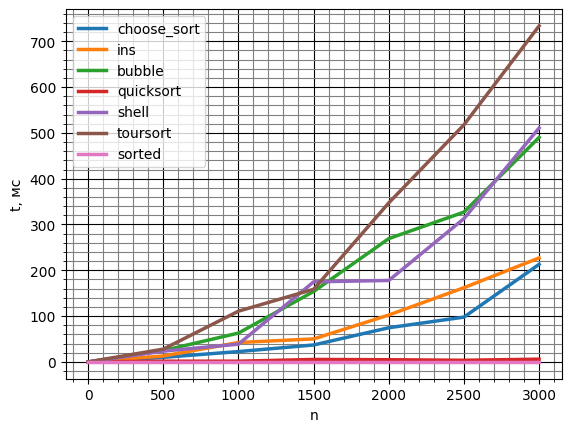

In [13]:
fig, ax = plt.subplots()

#цикл отрисовки графиков
for my_sort in sorts:
    x = range(1, 3002, 500)
    y = my_sort.times
    ax.plot(x, y, linewidth = 2.5, label = my_sort.name)

plt.legend()
ax.set_xlabel("n")
ax.set_ylabel("t, мс")
ax.grid(which='major', color = 'k')

ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = '-')


### Вывод


На графиках мы можем видеть, что каждая сортировка имеет свою облатсь применения в зависимости от длины массива. Наболее быстрым является quicksort, встроенный в python, далее наш quicksort с небольшим отстованием.

В ходе проделанной работы мы научились работать с jupyter-notebook, писать 6 различных видов сортировок и замерять их время выполнения